# Creative Design Component Extraction - Dominant Colors

In [5]:
# import libraries
import smart_open as so
import boto3
import pandas as pd
from io import StringIO
import selenium
import ffmpeg
# import pytesseract
import zipfile

# libraries for extracting colors
import extcolors
# from colormap import rgb2hex
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import numpy as np
from sklearn.cluster import KMeans
# import imutils

In [6]:
# # add custom libraries
# import sys
# # from scripts.color_scripts import identify_color_composition, color_to_df
# from .. import scripts.color_scripts

In [7]:
bucket = "10ac-batch-6"
key = "data/w11/Challenge_Data.zip"
s3_resource = boto3.resource('s3')
zip_obj = s3_resource.Object(bucket_name=bucket, key=key)

In [8]:
# requesting a single file from the zip
with so.open('s3://10ac-batch-6/data/w11/Challenge_Data.zip', 'rb') as file_data:
    with zipfile.ZipFile(file_data) as z:
        # or any other file instead of csv
        with z.open('Challenge_Data/performance_data.csv') as zip_file_data:
            csv_data = zip_file_data.read().decode("utf-8")

In [9]:
csvStringIO = StringIO(csv_data)
df = pd.read_csv(csvStringIO, sep=",", header=None)
df.head()

,0,1,2,3
0,game_id,preview_link,ER,CTR
1,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.2092687099914451,0.0584383020148086
2,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.2745519713261649,0.0747311827956989
3,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.1036884084375885,0.0422284303008218
4,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.1369626263001379,0.0053933765450966


In [10]:
# utility functions to get the images from the creatives
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
# image = get_image("/home/amanuel_zewdu/creative_image_optimization/data/Challenge_Data/Assets/0301a5865ecfd7c5a1653dde10a5aedf/")
image = get_image("/home/wangui_gachugu/creative_image_optimization/data/imageopt.png")
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [12]:
# read image
im = cv2.imread("/home/wangui_gachugu/creative_image_optimization/data/imageopt.png")
original_shape = im.shape
print(im.shape)

(500, 1200, 3)


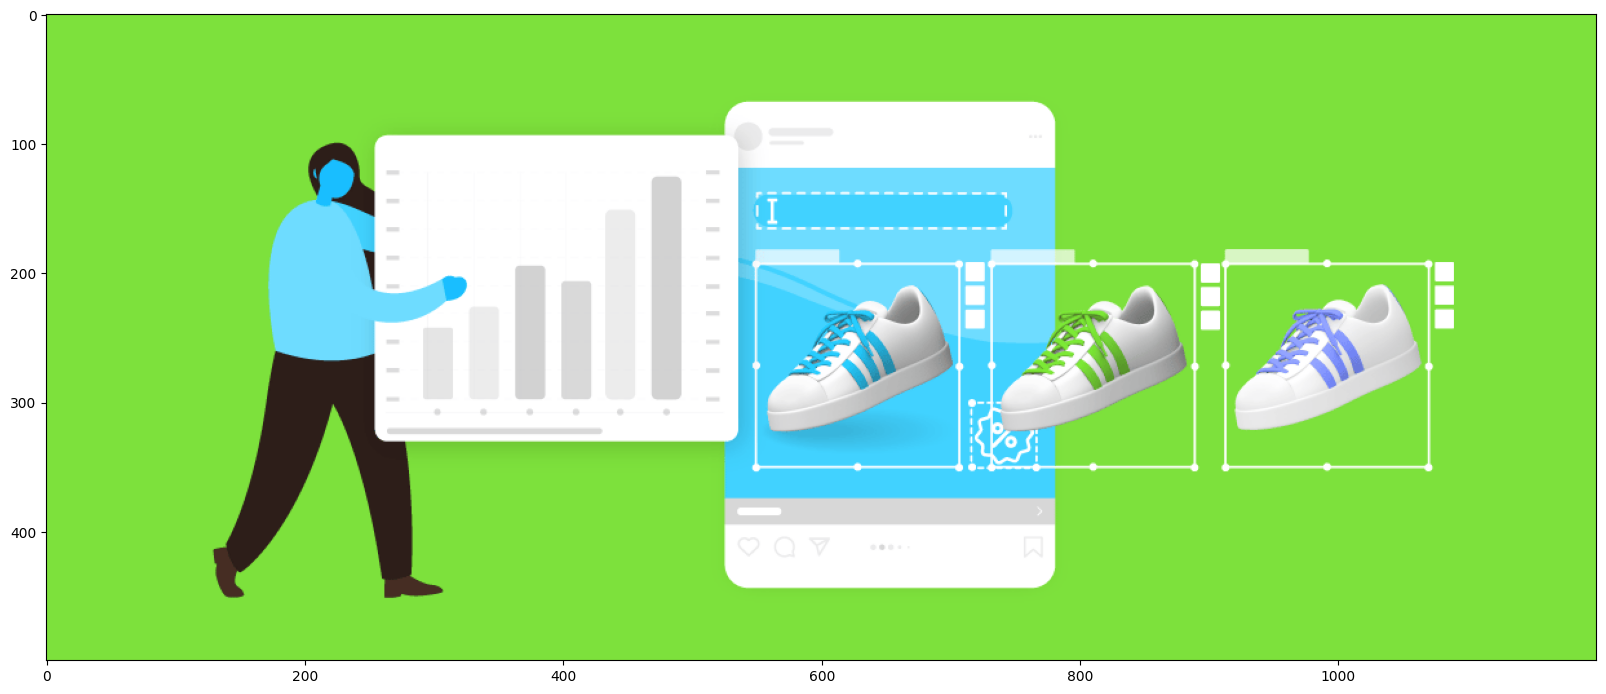

In [13]:
# plot original image
plt.figure(figsize = (20,10))
plt.imshow(im)
plt.show()

In [14]:
# flatten image into linear array
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(600000, 3)


In [15]:
# setting up the clusters for kmeans clustering
dominant_colors = 5
km = KMeans(n_clusters = dominant_colors)
(km.fit(all_pixels))

KMeans(n_clusters=5)

In [16]:
centers = km.cluster_centers_
centers

array([[251.66070951, 252.32585208, 252.57501419],
       [124.93818135, 224.41574729,  60.29013062],
       [ 87.10460823, 210.48683247, 251.63220391],
       [ 47.05847272,  32.87448588,  26.94269262],
       [204.9623905 , 210.17309935, 206.54261712]])

In [17]:
centers = np.array(centers, dtype = "uint8")
print(centers)

[[251 252 252]
 [124 224  60]
 [ 87 210 251]
 [ 47  32  26]
 [204 210 206]]


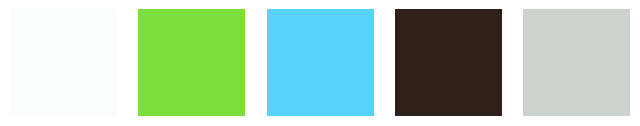

In [18]:
i = 1

plt.figure(0, figsize = (8,2))

colors = []
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis(False)
    i += 1
    
    colors.append(each_col)
    
    a = np.zeros((100,100,3), dtype = "uint8")
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [19]:
new_img = np.zeros((936*1136,3), dtype = "uint8")

print(new_img.shape)

(1063296, 3)


In [20]:
colors

[array([251, 252, 252], dtype=uint8),
 array([124, 224,  60], dtype=uint8),
 array([ 87, 210, 251], dtype=uint8),
 array([47, 32, 26], dtype=uint8),
 array([204, 210, 206], dtype=uint8)]

In [21]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [1]:
# for ix in range(new_img.shape[0]):
#     new_img[ix] = colors[km.labels_[ix]]
    
# new_img = new_img.reshape((original_shape))
# plt.imshow(new_img)
# plt.show(0)